In [97]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Use TensorFlow's Keras API (recommended)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [98]:
# Load the dataset
df = pd.read_csv('GOOGL.csv')

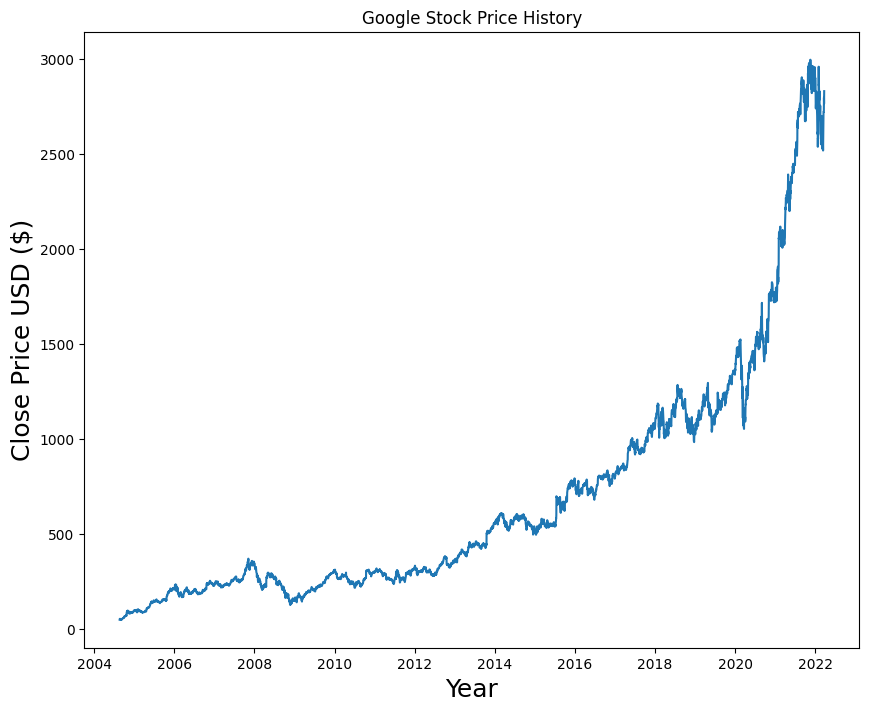

In [99]:
# Visualize the dataset
plt.figure(figsize=(10,8))
plt.title('Google Stock Price History')
plt.plot(pd.to_datetime(df['Date']), df['Close'])  # Use Date on x-axis directly
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [100]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

In [101]:
# Convert the dataframe to a numpy array
dataset = data.values

In [102]:
# Scale the data
# Scale the data using the default range (0, 1)
scaler = MinMaxScaler()  
scaled_data = scaler.fit_transform(dataset)

In [103]:
# Get the number of rows to train the model on
training_data_len = int(np.ceil(0.8 * len(dataset))) #This calculates the length of the training dataset. You're splitting the data into 80% training and 20% testing

In [104]:
# Create the training data
train_data = scaled_data[0:training_data_len, :]

In [105]:
# Define time_steps
time_steps = 30

# Split the data into x_train and y_train 
x_train = []
y_train = []

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, 0])
    y_train.append(train_data[i, 0])

In [106]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [107]:
# Reshape the data for LSTM input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [108]:
# Build the LSTM model
model = Sequential()

# First LSTM layer with 50 units, returns sequences for the next LSTM layer, and accepts input with shape (time_steps, 1) where 1 is the feature dimension.
model.add(LSTM(50, return_sequences=True, input_shape=(30, 1)))

# Second LSTM layer with 50 units, does not return sequences as it's the last LSTM layer.
model.add(LSTM(50))

# Dense layer with 25 NEURONS (fully connected layer), adds non-linearity to the model.
model.add(Dense(25))

# Output layer with a single unit (predicts the stock price for the next day).
model.add(Dense(1))


In [109]:
# Compile the model
model.compile(optimizer='adam', loss='mse')#Uses the Adam optimization algorithm to minimize the loss function and update the model's weights.Uses Mean Squared Error as the loss function, Suitable for regression tasks where the goal is to predict continuous values like stock prices.

In [110]:
# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
110/110 [==============================] - 5s 19ms/step - loss: 9.6985e-04
Epoch 2/5
110/110 [==============================] - 2s 19ms/step - loss: 3.9858e-05
Epoch 3/5
110/110 [==============================] - 2s 17ms/step - loss: 3.8441e-05
Epoch 4/5
110/110 [==============================] - 2s 17ms/step - loss: 3.8643e-05
Epoch 5/5
110/110 [==============================] - 2s 17ms/step - loss: 3.5790e-05


In [111]:
# Create the testing data
test_data = scaled_data[training_data_len - time_steps:, :]

In [112]:
# Split the data into x_test and y_test datasets
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0])

In [113]:
# Convert x_test to a numpy array
x_test = np.array(x_test)

In [114]:
# Reshape the data for LSTM input
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [115]:
# Get the predicted stock prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

28/28 [==============================] - 1s 7ms/step


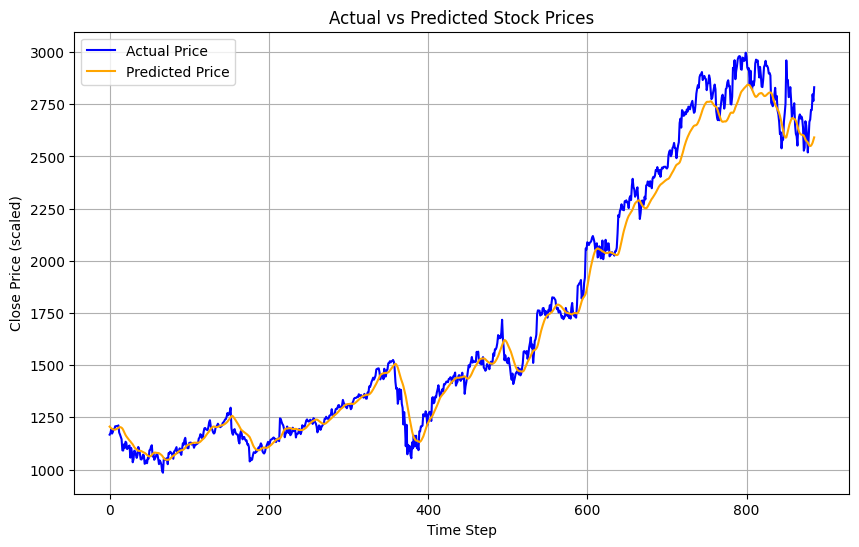

In [116]:
# Plot actual vs predicted values without dates
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual Price', color='blue')  # Actual prices
plt.plot(predictions, label='Predicted Price', color='orange')  # Predicted prices
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time Step')
plt.ylabel('Close Price (scaled)')
plt.legend()
plt.grid(True)
plt.show()
